# **DATA ANALYSIS**

In [ ]:
#Packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from	datetime	import	datetime,	timedelta

In [ ]:
# 1. Data Loading and Preprocessing
df = pd.read_csv('/content/sample_data/Walmart.csv')

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

# Convert 'Date' column to datetime objects for time series analysis
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

print(df)

Missing Values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53

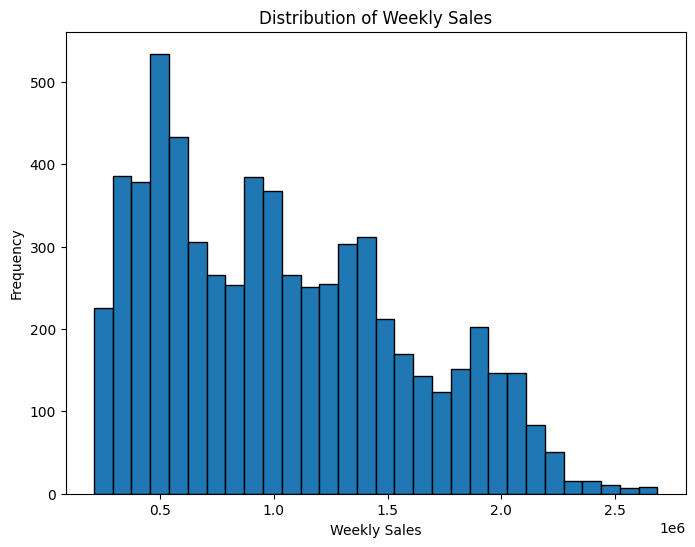

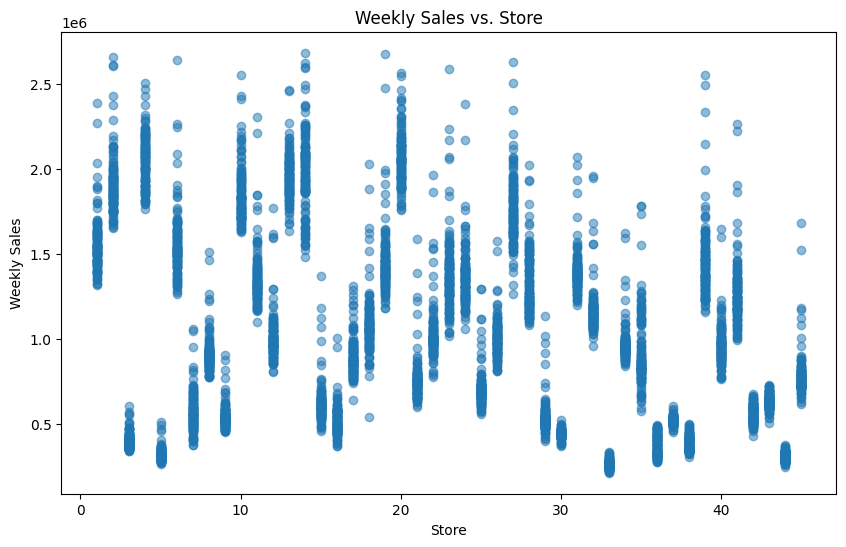


Summary Statistics:
              Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6401.000000                           6401  6.401000e+03   6401.000000   
mean     23.054210  2011-06-17 04:24:33.519762432  1.036130e+06      0.068895   
min       1.000000            2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-08 00:00:00  5.517431e+05      0.000000   
50%      23.000000            2011-06-17 00:00:00  9.572983e+05      0.000000   
75%      34.000000            2012-02-24 00:00:00  1.414565e+06      0.000000   
max      45.000000            2012-10-26 00:00:00  2.685352e+06      1.000000   
std      12.991284                            NaN  5.451961e+05      0.253296   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6401.000000  6401.000000  6401.000000   6401.000000  
mean     60.772042     3.359634   171.642219      8.002298  
min      -2.060000     2.472000   126.064000      3.879000  
25% 

In [ ]:
# 2. Exploratory Data Analysis (EDA)

# Histogram of Weekly Sales
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
plt.hist(df['Weekly_Sales'], bins=30, edgecolor='black')  # Increased bins for better granularity
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

# Scatter plot of Weekly Sales vs. Store
plt.figure(figsize=(10, 6))
plt.scatter(df['Store'], df['Weekly_Sales'], alpha=0.5) # Added alpha for better visualization of overlapping points
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Store')
plt.show()

# Summary statistics of the dataset
summary = df.describe()
print("\nSummary Statistics:\n", summary)

In [ ]:
# 3. Key Business Metrics
# Total Sales
total_sales = df['Weekly_Sales'].sum()
print("\nTotal Sales:", total_sales)

# Total Number of Sales Records (not necessarily orders)
total_sales_records = df['Weekly_Sales'].count()  # Corrected label
print("Total Sales Records:", total_sales_records)

# Average Weekly Sales
average_sales = df['Weekly_Sales'].mean()
print("Average Weekly Sales:", average_sales)


Total Sales: 6737218987.11
Total Sales Records: 6435
Average Weekly Sales: 1046964.8775617715


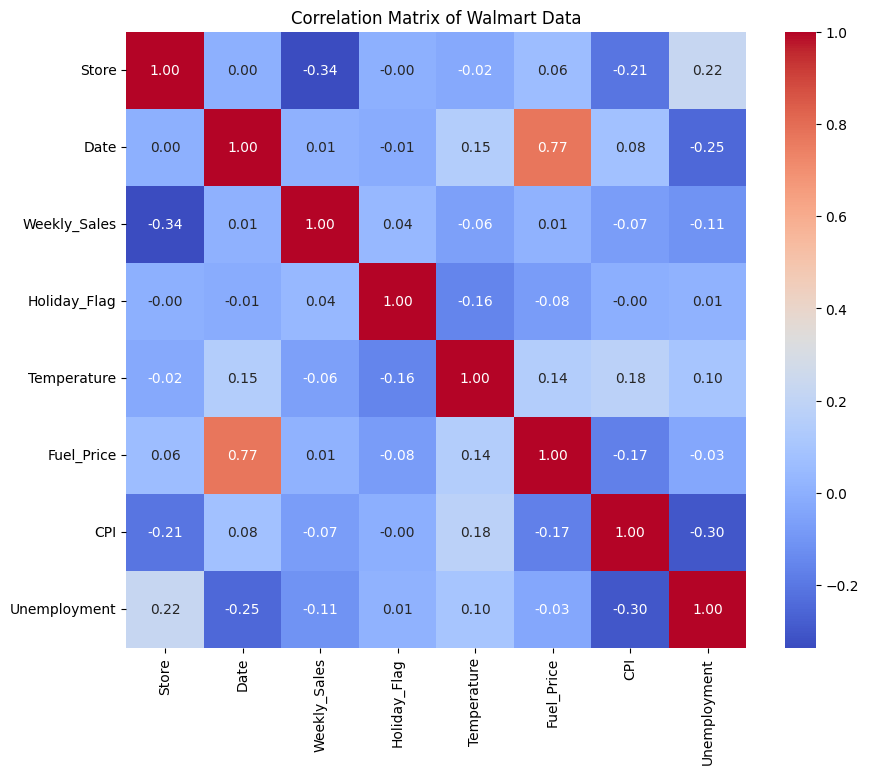

In [ ]:
# 4. Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Improved visualization
plt.title('Correlation Matrix of Walmart Data')
plt.show()

# Correlation at 0.77



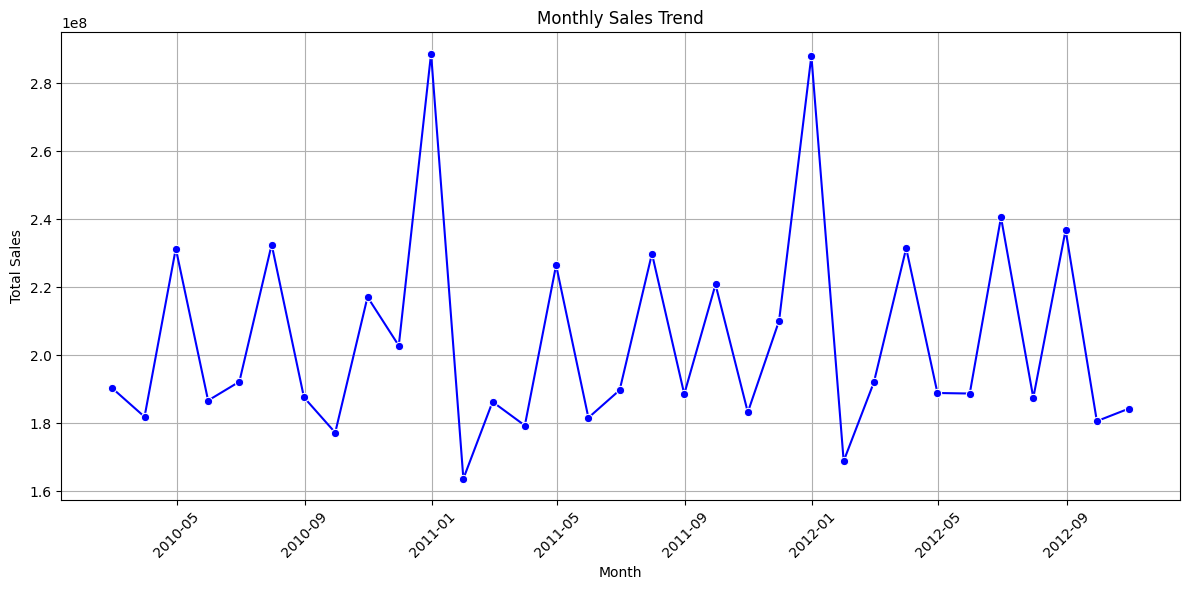

In [ ]:
# 5. Data Visualization - Monthly Sales Trend

# Group data by month and calculate the total sales for each month
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='ME'))['Weekly_Sales'].sum().reset_index()

# Create a line plot of monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Weekly_Sales', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True) # Add gridlines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# 6. Holiday Effects
# Assuming 'Holiday_Flag' column indicates holidays (1 for holiday, 0 otherwise)
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum()
print("\nSales during Holidays vs. Non-Holidays:\n", holiday_sales)

# Sales by Store
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()
print("\nTotal Sales by Store:\n", sales_by_store)

# Time Series Decomposition (using statsmodels)
from statsmodels.tsa.seasonal import seasonal_decompose

# Group data by date and sum weekly sales
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum()


Sales during Holidays vs. Non-Holidays:
 Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

Total Sales by Store:
 Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.

<Figure size 1200x800 with 0 Axes>

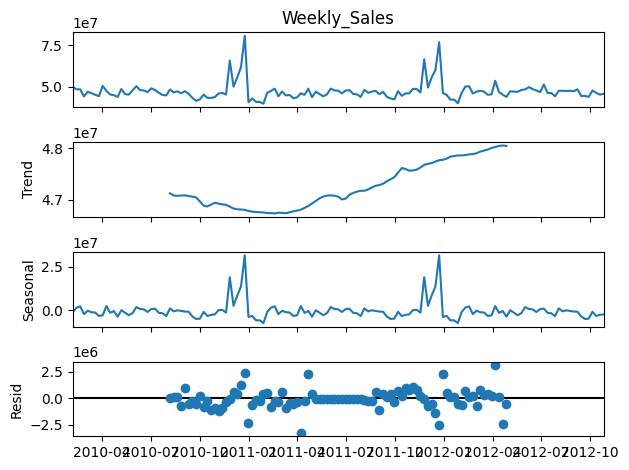

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4jmg2i4/vabriaky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk4jmg2i4/xpdmyz8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8840', 'data', 'file=/tmp/tmpk4jmg2i4/vabriaky.json', 'init=/tmp/tmpk4jmg2i4/xpdmyz8h.json', 'output', 'file=/tmp/tmpk4jmg2i4/prophet_modelizqhkmiy/prophet_model-20250430061958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


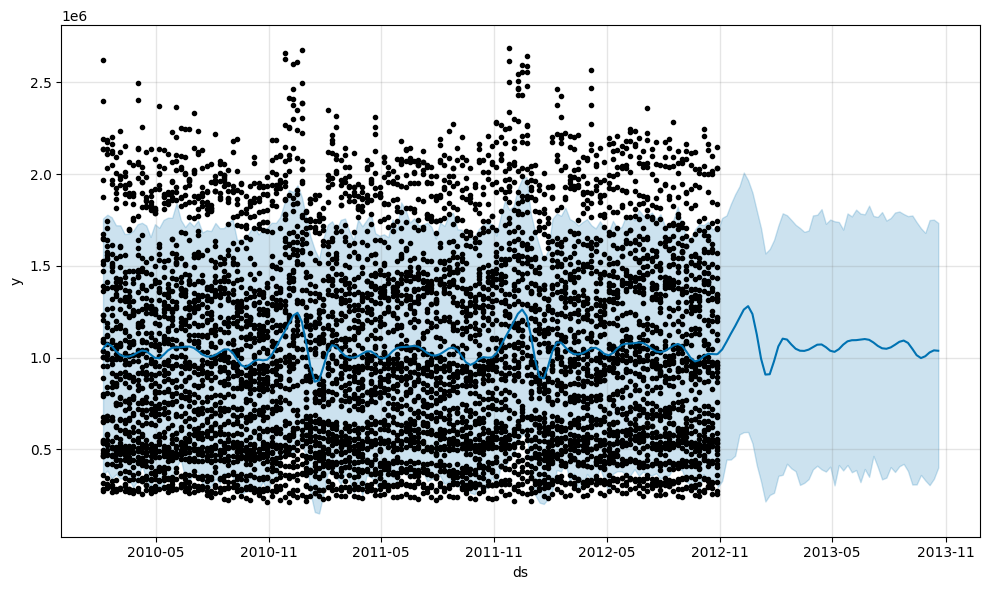

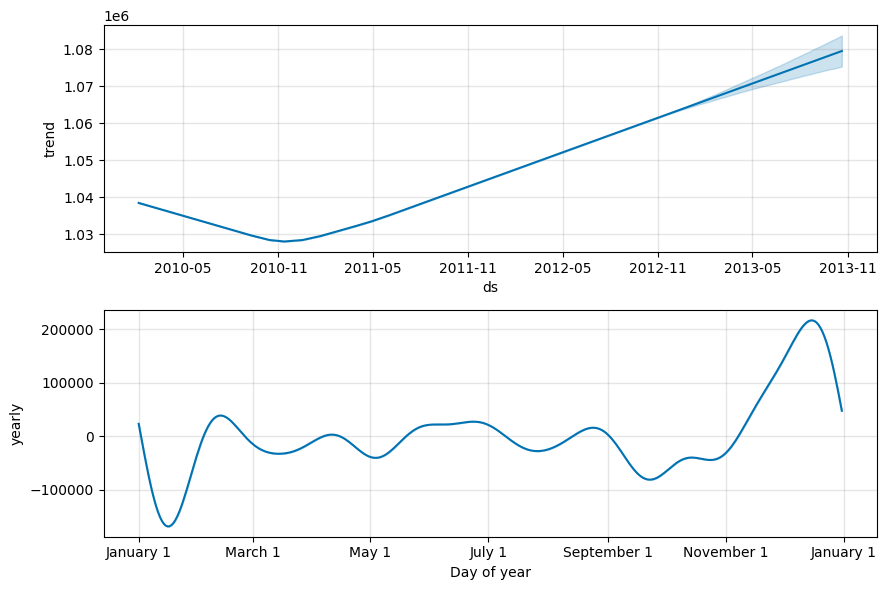

In [ ]:
# 7. Perform time series decomposition
decomposition = seasonal_decompose(sales_by_date, model='additive', period=52) # Assuming a yearly seasonality with 52 weeks

# Plot the decomposition components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Forecasting (using Prophet)
from prophet import Prophet

# Prepare data for Prophet (requires specific column names)
prophet_df = pd.DataFrame({'ds': df['Date'], 'y': df['Weekly_Sales']})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=52, freq='W') # Forecast 52 weeks into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()